In [14]:
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.image import AxesImage, NonUniformImage
import numpy as np
import math
from scipy.interpolate import interp1d
from PIL import Image
import cv2
import shutil
import random
import uuid

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

from sklearn.utils import shuffle

import tensorflow as tf

sys.path.append(os.path.join(os.getcwd(),'..'))
from lib import find_nearest_index, FigureSize

In [59]:
TRAIN_DATA_PATH= os.path.join(os.getcwd(), '..','data','train')
file1 = os.path.join(TRAIN_DATA_PATH,'6304.78','6304.78.000060.BMP')
file2 = os.path.join(TRAIN_DATA_PATH,'6217.28','6217.28.000018.BMP')


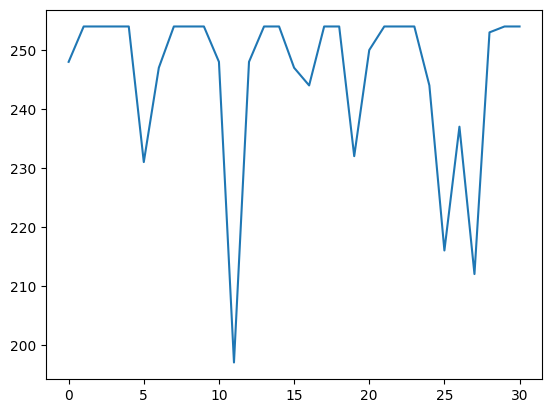

In [56]:
with Image.open(file1) as im1:
    data1 = im1.tobytes()

row = list(data1)[0:31]

plt.figure()
plt.plot(row)
plt.show()

tf.Tensor([3.6011887e-05], shape=(1,), dtype=float32)
tf.Tensor([3.6011887e-05], shape=(1,), dtype=float32)


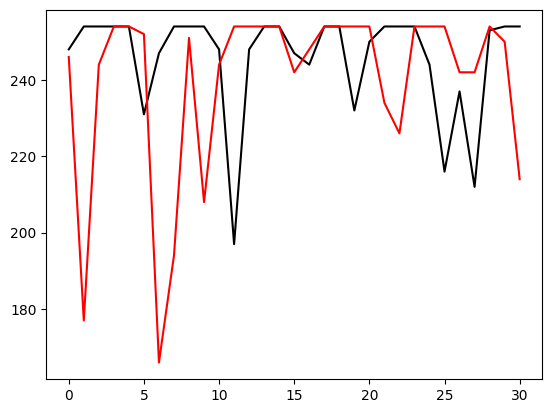

[52788]


In [61]:
# Read images (of size 255 x 255) from file.
im1 = tf.image.decode_image(tf.io.read_file(file1))
im2 = tf.image.decode_image(tf.io.read_file(file2))
im2 = im2 * 0 
tf.shape(im1)  # `img1.png` has 3 channels; shape is `(255, 255, 3)`
tf.shape(im2)  # `img2.png` has 3 channels; shape is `(255, 255, 3)`
# Add an outer batch for each image.
im1 = tf.expand_dims(im1, axis=0)
im2 = tf.expand_dims(im2, axis=0)
# Compute SSIM over tf.uint8 Tensors.
ssim1 = tf.image.ssim(im1, im2, max_val=255, filter_size=11,
                        filter_sigma=1.5, k1=0.01, k2=0.03)

# Compute SSIM over tf.float32 Tensors.
im1 = tf.image.convert_image_dtype(im1, tf.float32)
im2 = tf.image.convert_image_dtype(im2, tf.float32)
ssim2 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)

print(ssim1)
print(ssim2)

with Image.open(file1) as im1:
    bytes1 = im1.tobytes()
ref_rec = list(bytes1)[0:31]

with Image.open(file2) as im2:
    bytes2 = im2.tobytes()
inp_rec = list(bytes2)[0:31]

plt.figure()
plt.plot(ref_rec, color='k')
plt.plot(inp_rec, color='r')
plt.show()

ref_time = np.correlate(ref_rec,ref_rec)
inp_time = np.correlate(ref_rec,inp_rec)
diff_time = abs(ref_time-inp_time)
print(diff_time)

In [37]:
file2 = file1

In [38]:
# Read images (of size 255 x 255) from file.
im1 = tf.image.decode_image(tf.io.read_file(file1))
im2 = tf.image.decode_image(tf.io.read_file(file2))
im2 = im2 * 0 
tf.shape(im1)  # `img1.png` has 3 channels; shape is `(255, 255, 3)`
tf.shape(im2)  # `img2.png` has 3 channels; shape is `(255, 255, 3)`
# Add an outer batch for each image.
im1 = tf.expand_dims(im1, axis=0)
im2 = tf.expand_dims(im2, axis=0)
# Compute SSIM over tf.uint8 Tensors.
ssim1 = tf.image.ssim(im1, im2, max_val=255, filter_size=11,
                        filter_sigma=1.5, k1=0.01, k2=0.03)

# Compute SSIM over tf.float32 Tensors.
im1 = tf.image.convert_image_dtype(im1, tf.float32)
im2 = tf.image.convert_image_dtype(im2, tf.float32)
ssim2 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)

print(ssim1)
print(ssim2)

with open(file1,'rb') as im1_f:
    im1 = im1_f.read()
ref_rec = [x for x in im1]

with open(file2,'rb') as im2_f:
    im2 = im2_f.read()
inp_rec = [x for x in im2]


ref_time = np.correlate(ref_rec,ref_rec)
inp_time = np.correlate(ref_rec,inp_rec)
diff_time = abs(ref_time-inp_time)
print(diff_time)

tf.Tensor([3.6011887e-05], shape=(1,), dtype=float32)
tf.Tensor([3.6011887e-05], shape=(1,), dtype=float32)
[0]


In [11]:
from datetime import datetime

In [13]:
# t_l = 34502
# percent = 5
# part = t_l * percent/100
# for i in range(t_l):
#     if int(i%part)==0:
#         print (i, int(i% part), datetime.now(), int(i/part*percent))
    

0 0 2024-02-25 12:44:52.276590 0
1726 0 2024-02-25 12:44:52.276797 5
3451 0 2024-02-25 12:44:52.276990 10
5176 0 2024-02-25 12:44:52.277183 15
6901 0 2024-02-25 12:44:52.277377 20
8626 0 2024-02-25 12:44:52.277570 25
10351 0 2024-02-25 12:44:52.277763 30
12076 0 2024-02-25 12:44:52.277952 35
13801 0 2024-02-25 12:44:52.278142 40
15526 0 2024-02-25 12:44:52.278398 45
17251 0 2024-02-25 12:44:52.278587 50
18977 0 2024-02-25 12:44:52.278768 55
20702 0 2024-02-25 12:44:52.278951 60
22427 0 2024-02-25 12:44:52.279133 65
24152 0 2024-02-25 12:44:52.279316 70
25877 0 2024-02-25 12:44:52.279500 75
27602 0 2024-02-25 12:44:52.279685 80
29327 0 2024-02-25 12:44:52.279867 85
31052 0 2024-02-25 12:44:52.280049 90
32777 0 2024-02-25 12:44:52.280233 95
